<a href="https://colab.research.google.com/github/Ananya616/Projects/blob/master/Image-Data-Augmentation/Image_Data_Augmentation_with_Keras_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Data Augmentation with Keras


# Task 1: Import Libraries

In [27]:
from zipfile import ZipFile
file_name = '/content/dw3BS3FqQXiNwUtxavF4Ng_5451e8c3fea6410999a3107012e98a33_Complete-Notebook---Data-Augmentation.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [28]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)

Using TensorFlow 2.2.0


# Task 2: Rotation

In [29]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40
)

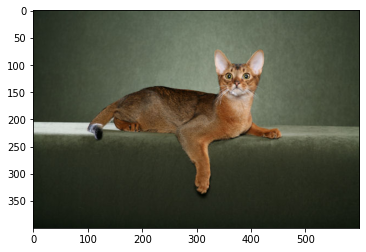

In [30]:
image_path = '/content/images/train/cat/cat.jpg'

plt.imshow(plt.imread(image_path));

Found 1 images belonging to 1 classes.


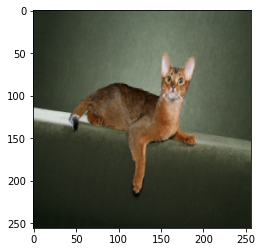

In [35]:
x, y = next(generator.flow_from_directory('/content/images', batch_size=1))

plt.imshow(x[0].astype('uint8'));

# Task 3: Width and Height Shifts

In [38]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=[-40, -20, 0, 20, 40],
    height_shift_range=[-50,50]
)

Found 1 images belonging to 1 classes.


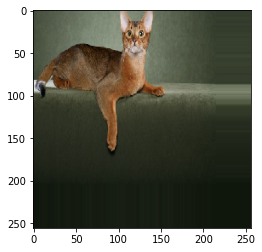

In [39]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 4: Brightness

Found 1 images belonging to 1 classes.


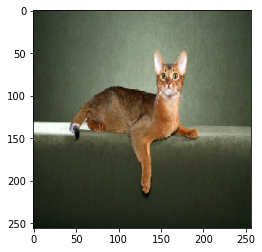

In [40]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range=(0., 2.)
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 5: Shear Transformation

Found 1 images belonging to 1 classes.


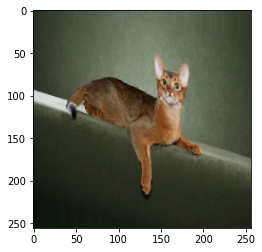

In [41]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range=45
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 6: Zoom

Found 1 images belonging to 1 classes.


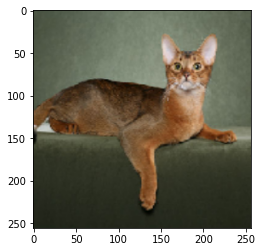

In [42]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=0.5
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 7: Channel Shift

Found 1 images belonging to 1 classes.


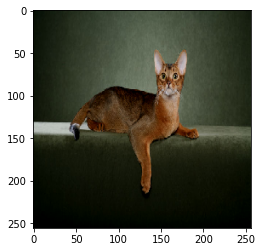

In [43]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    channel_shift_range=100
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 8: Flips

Found 1 images belonging to 1 classes.


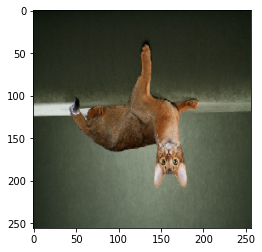

In [44]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 9: Normalization

### Featurewise

In [45]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True
)

generator.fit(x_train)

170500096/170498071 [==============================] - 4s 0us/step


In [46]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

-0.08273571 0.97239995 [[3]]
120.70756512369792


### Samplewise

In [47]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

3.973643e-08 1.0 [[3]]


# Task 10: Rescale and Preprocessing Function

In [48]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    rescale=1.
)

In [49]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))

In [50]:
print(x.mean(), x.std(), y)

0.20459561 0.45583048 [[2]]


# Task 11: Using in Model Training

In [51]:
model = tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(include_top=False, input_shape=(32, 32, 3), pooling='avg'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

9412608/9406464 [==============================] - 0s 0us/step


In [52]:
_ = model.fit(
    generator.flow(x_train, y_train, batch_size=32),
    steps_per_epoch=10, epochs=1
)

10/10 [==============================] - 2s 219ms/step - loss: 3.0820 - accuracy: 0.1125
